In [ ]:
import pandas as pd
import gzip
import json
import numpy as np

# Office-product

In [ ]:
# review file 2014
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products.json.gz

--2023-09-12 09:32:57--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 249771721 (238M) [application/x-gzip]
Saving to: ‘reviews_Office_Products.json.gz’

reviews_Office_Prod 100%[===================>] 238.20M  17.6MB/s    in 18s     

2023-09-12 09:33:15 (13.3 MB/s) - ‘reviews_Office_Products.json.gz’ saved [249771721/249771721]



In [ ]:
# metadata
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Office_Products.json.gz

--2023-09-12 09:33:15--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Office_Products.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47605216 (45M) [application/x-gzip]
Saving to: ‘meta_Office_Products.json.gz’

meta_Office_Product 100%[===================>]  45.40M  11.0MB/s    in 8.4s    

2023-09-12 09:33:24 (5.41 MB/s) - ‘meta_Office_Products.json.gz’ saved [47605216/47605216]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 5core
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Musical_Instruments_5.json.gz

In [ ]:
# code for opening the file
def parse(path):
    g=gzip.open(path,'rb')
    for i in g:
        yield eval(i)

def getDF(path):
    x=0
    df1={}
    for j in parse(path):
        df1[x]=j
        x=x+1
    return pd.DataFrame.from_dict(df1,orient='index')

In [ ]:
file_path_1='/content/reviews_Office_Products.json.gz'


In [ ]:
review_df =getDF(file_path_1)

review_df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,"07 19, 2013"
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,"01 29, 2013"
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,"10 16, 2011"
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,"12 31, 2012"
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,"09 21, 2013"
5,AAYGDWCI3LDQP,0439394058,NaN,"[0, 0]",as described,5.0,Five Stars,1405382400,"07 15, 2014"
6,AI7SARYVM8FGA,0439394058,A. Manternach,"[5, 5]","Nice size, colorful simple pictures and a nice...",4.0,Perfect for what I was looking for,1212624000,"06 5, 2008"
7,A1BUVOGGFTGMBN,0439394058,ANON,"[5, 5]",This is not coated in plastic as the descripti...,2.0,very disappointed,1389744000,"01 15, 2014"
8,A35UM9B38X7AYS,0439394058,C. L. OLeary,"[0, 0]",I will take other reviewers suggestions and do...,5.0,A lot for the price.,1386201600,"12 5, 2013"
9,AM2U8KJROWYKR,0439394058,EB227,"[11, 11]","Great calendar, my 3 year old loves it. I bou...",4.0,Needs laminated,1346976000,"09 7, 2012"


In [ ]:
review_df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [ ]:
review_df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      6801
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [ ]:
len(review_df)

1243186

In [ ]:
# metadata

file_path_2='/content/meta_Office_Products.json.gz'

meta_df=getDF(file_path_2)

# View the first 10 records of the DataFrame
meta_df.head(10)

,asin,description,price,imUrl,related,salesRank,categories,title,brand
0,0078800242,All in one TeacherWorks Plus CD-ROM,93.06,http://ecx.images-amazon.com/images/I/41K1aBkl...,{'buy_after_viewing': ['007861970X']},{'Software': 18529},"[[Office Products, Office & School Supplies, C...",NaN,NaN
1,0113000316,High quality inkjet cartridges use high-densit...,NaN,http://ecx.images-amazon.com/images/I/51AMwP3D...,NaN,NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
2,043928631X,"Harry Potter living bookmark showing Harry, He...",NaN,http://ecx.images-amazon.com/images/I/41SulB7T...,NaN,NaN,"[[Office Products, Office & School Supplies, L...",Harry Potter Lenticular Hologram Bookmark - Ha...,NaN
3,0439340039,Windows based computer game.,NaN,http://ecx.images-amazon.com/images/I/51zQE0w%...,NaN,{'Software': 32784},"[[Office Products, Office & School Supplies, E...",NaN,NaN
4,0439394058,"126 pieces: 23"" tall schoolhouse calendar, 12 ...",11.64,http://ecx.images-amazon.com/images/I/51DFp0Lg...,"{'also_bought': ['B000QE1HHU', 'B00207MG4Y', '...",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic SC939405 All-In-One Schoolhouse Cal...,Scholastic
5,0439492335,Decorate for the Spring season. Includes 1 Ext...,9.99,http://ecx.images-amazon.com/images/I/61KmH%2B...,"{'also_bought': ['1594416249', '1600220991', '...",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic TF3078 Happy Easter! Bulletin Board,Scholastic
6,0439492602,Accents for your bulletin boards! Use as name ...,8.67,http://ecx.images-amazon.com/images/I/61mhUfav...,"{'also_viewed': ['1600220983', 'B00BWSYIJS']}",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic TF3281 U.S. Coins and Bills Accent ...,Scholastic
7,0439499488,Reproducible pages on the back of each chart!,NaN,http://ecx.images-amazon.com/images/I/51Lze0N2...,"{'also_bought': ['0545196388', '0439506042', '...",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic Manuscript Alphabet Chart (TF2211),NaN
8,043949950X,"Flat, large 12"" x 4"" size name plates. Extra l...",11.25,http://ecx.images-amazon.com/images/I/41jubJKs...,"{'also_bought': ['B000FA3Y9E', 'B000CD0SRA', '...",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic Alphabet-Number Line (Standard) Nam...,Scholastic
9,043950015X,Accents for your bulletin boards! Use as name ...,8.23,http://ecx.images-amazon.com/images/I/61yI7rMn...,"{'also_bought': ['0439654939', 'B000QUQDJ6', '...",NaN,"[[Office Products, Office & School Supplies, E...","Scholastic TF3256 Bees, Bugs &amp; Butterflies...",Scholastic


In [ ]:
len(meta_df)

134838

In [ ]:
meta_df.isna().sum()

asin                0
description     10073
price           32353
imUrl              37
related         34592
salesRank      110986
categories          0
title             507
brand           76974
dtype: int64

In [ ]:
meta_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

In [ ]:
meta_df.head(5)

,asin,description,price,imUrl,related,salesRank,categories,title,brand
0,0078800242,All in one TeacherWorks Plus CD-ROM,93.06,http://ecx.images-amazon.com/images/I/41K1aBkl...,{'buy_after_viewing': ['007861970X']},{'Software': 18529},"[[Office Products, Office & School Supplies, C...",NaN,NaN
1,0113000316,High quality inkjet cartridges use high-densit...,NaN,http://ecx.images-amazon.com/images/I/51AMwP3D...,NaN,NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
2,043928631X,"Harry Potter living bookmark showing Harry, He...",NaN,http://ecx.images-amazon.com/images/I/41SulB7T...,NaN,NaN,"[[Office Products, Office & School Supplies, L...",Harry Potter Lenticular Hologram Bookmark - Ha...,NaN
3,0439340039,Windows based computer game.,NaN,http://ecx.images-amazon.com/images/I/51zQE0w%...,NaN,{'Software': 32784},"[[Office Products, Office & School Supplies, E...",NaN,NaN
4,0439394058,"126 pieces: 23"" tall schoolhouse calendar, 12 ...",11.64,http://ecx.images-amazon.com/images/I/51DFp0Lg...,"{'also_bought': ['B000QE1HHU', 'B00207MG4Y', '...",NaN,"[[Office Products, Office & School Supplies, E...",Scholastic SC939405 All-In-One Schoolhouse Cal...,Scholastic


In [ ]:
meta_df.isna().sum()

asin                0
description     13531
price           32353
imUrl              37
related         34592
salesRank      110986
categories          0
title             507
brand           77552
dtype: int64

In [ ]:
meta_df.shape

(134838, 9)

In [ ]:
review_df.shape

(1243186, 9)

In [ ]:
# merging the two data-file in to a single one
office_df=pd.merge(review_df,meta_df,on='asin')

office_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,price,imUrl,related,salesRank,categories,title,brand
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,"07 19, 2013",All in one TeacherWorks Plus CD-ROM,93.06,http://ecx.images-amazon.com/images/I/41K1aBkl...,{'buy_after_viewing': ['007861970X']},{'Software': 18529},"[[Office Products, Office & School Supplies, C...",NaN,NaN
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,"01 29, 2013",High quality inkjet cartridges use high-densit...,NaN,http://ecx.images-amazon.com/images/I/51AMwP3D...,NaN,NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,"10 16, 2011",High quality inkjet cartridges use high-densit...,NaN,http://ecx.images-amazon.com/images/I/51AMwP3D...,NaN,NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,"12 31, 2012","Harry Potter living bookmark showing Harry, He...",NaN,http://ecx.images-amazon.com/images/I/41SulB7T...,NaN,NaN,"[[Office Products, Office & School Supplies, L...",Harry Potter Lenticular Hologram Bookmark - Ha...,NaN
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,"09 21, 2013",Windows based computer game.,NaN,http://ecx.images-amazon.com/images/I/51zQE0w%...,NaN,{'Software': 32784},"[[Office Products, Office & School Supplies, E...",NaN,NaN


In [ ]:
office_df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,price,imUrl,related,salesRank,categories,title,brand
1243181,A23UIUEO9PVK1G,B00LQZE2KM,roy dempsey,"[0, 0]",I am a stationery retailer and came across the...,5.0,awesome,1405728000,"07 19, 2014",Lightahead LA-7553 Expanding File with 13 pock...,5.99,http://ecx.images-amazon.com/images/I/41RtloHH...,NaN,NaN,"[[Office Products, Office & School Supplies, F...",Lightahead&reg; LA-7553 Expanding File Folder ...,NaN
1243182,A3W0IG7LIY99CK,B00LSYQC7C,pettygirl,"[0, 0]","My kids LOVE these, especially my daughter who...",5.0,"My kids LOVE these, especially my daughter who...",1405296000,"07 14, 2014",Friend Chips is the hottest new trading and co...,NaN,http://ecx.images-amazon.com/images/I/61DZSNSQ...,{'also_viewed': ['B00LV1MMX0']},NaN,"[[Office Products, Office & School Supplies, F...","Friend Chips Trading and Collecting Game, 4 Ch...",NaN
1243183,AX0OWSOOJA1ZJ,BT008G9O8G,Jason E.S. Clements,"[0, 0]",Even though I recieved an e-mail indicating th...,5.0,Very NIce Transaction,1392854400,"02 20, 2014","Continuous Length Removable Paper Label 2-3/7""...",29.66,http://ecx.images-amazon.com/images/I/41SFeM42...,"{'also_bought': ['B0081TZD54', 'B0002VS66W', '...",NaN,"[[Office Products, Office & School Supplies, L...",Cont Removable Paper Label,Brother
1243184,A17R4GQHT3RW2R,BT008G9O9A,Natalie Woods-sproule,"[0, 0]",I was very pleased with the purchase of the la...,5.0,Very pleased with the purchase.,1365897600,"04 14, 2013","0.5"" - Diameter - 1200 Label(s)",16.95,http://ecx.images-amazon.com/images/I/41nN5t%2...,"{'also_bought': ['B0002VS6HG', 'B0002VS6HQ', '...",NaN,"[[Office Products, Office & School Supplies, L...",1/2&quot; Round Paper Labels,Brother
1243185,A12TWUP92WJJHB,BT008G9O9A,tornadokat,"[3, 4]",I bought several sized labels for my Brother G...,3.0,a review of labels? Sure why not!,1294963200,"01 14, 2011","0.5"" - Diameter - 1200 Label(s)",16.95,http://ecx.images-amazon.com/images/I/41nN5t%2...,"{'also_bought': ['B0002VS6HG', 'B0002VS6HQ', '...",NaN,"[[Office Products, Office & School Supplies, L...",1/2&quot; Round Paper Labels,Brother


In [ ]:
office_df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
description        object
price             float64
imUrl              object
related            object
salesRank          object
categories         object
title              object
brand              object
dtype: object

In [ ]:
office_df.shape

(1243186, 17)

* here we have sucessfully merged the 2 files in to a single file

In [ ]:
office_df.isna().sum()

reviewerID             0
asin                   0
reviewerName        6801
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
reviewTime             0
description       220045
price              98705
imUrl                299
related            66332
salesRank         889425
categories             0
title               5279
brand             422381
dtype: int64

In [ ]:
office_df['description'].value_counts()

div.aplusAnnotate {font-family: Arial, Helvetica, sans-serif; font-size: 13px;}div.aplusAcontentHead {font-size: 15px; font-weight: bold; font-family: Arial, Helvetica, sans-serif; }div.aplusAcontentBody {font-family: Arial, Helvetica, sans-serif; font-size: 15px; }div.aplusChartName {font-family: Arial, Helvetica, sans-serif; font-size: 15px; padding-top:.4em;}div.aplusAPlusHeader {font-size: 15px; font-weight: bold; font-family: Arial, Helvetica, sans-serif; }div.aplusAcontentLegal {font-size: 11px; font-weight: normal; font-family: Arial, Helvetica, sans-serif; margin:1em 0 1em 0;}div.aplusstyle11 {font-family: Arial, Helvetica, sans-serif; font-size: 10px; }div.aplusAcontentHeadOrange {font-size: 17px; font-weight: bold; font-family: Arial, Helvetica, sans-serif; color:#CC6600;}.aplusChartBg {background-color:#999; width:1px; height:70px;}.aplusCurrentViewBg {background-color:#ffffcc; }.aplusAcontentLegal ol {list-style-position:outside; margin:0em 1em 0em; padding:0em 1em 0em;}   

In [ ]:
office_df['categories'].value_counts()

[[Office Products, Office & School Supplies, Printer Ink & Toner, Inkjet Printer Ink]]                                                                                                                                                                150640
[[Office Products, Office Electronics, Telephones & Accessories, Cordless Telephones]]                                                                                                                                                                 64982
[[Office Products, Office & School Supplies, Printer Ink & Toner, Laser Printer Toner]]                                                                                                                                                                63590
[[Office Products, Office Electronics, Printers & Accessories, Printers, Laser Printers]]                                                                                                                                                        

In [ ]:
office_df['salesRank'].value_counts()

{}                                    220893
{'Home &amp; Kitchen': 2598}            1058
{'Home &amp; Kitchen': 6401}             901
{'Arts, Crafts & Sewing': 42}            833
{'Clothing': 114}                        744
                                       ...  
{'Health & Personal Care': 444533}         1
{'Sports &amp; Outdoors': 1348614}         1
{'Home &amp; Kitchen': 1641146}            1
{'Home &amp; Kitchen': 978478}             1
{'Toys & Games': 462013}                   1
Name: salesRank, Length: 19707, dtype: int64

In [ ]:
office_df['helpful'].value_counts()

[0, 0]          264980
[1, 1]           64810
[2, 2]           25720
[0, 1]           20408
[1, 2]           13572
                 ...  
[12, 36]             1
[5, 76]              1
[1658, 1818]         1
[90, 102]            1
[3, 48]              1
Name: helpful, Length: 2184, dtype: int64

In [ ]:
office_df['brand'].value_counts()

Avery              4577
Scotch             3083
Epson              2907
Canon              2005
Smead              1851
                   ... 
Namiki                5
Rhodia                5
American Crafts       5
Cambridge             5
Uline                 5
Name: brand, Length: 340, dtype: int64

In [ ]:
# removing all the columns having null values as majority
office_df.drop(columns=['related','imUrl','salesRank','description'],axis=1,inplace=True)

In [ ]:
office_df.isna().sum()

reviewerID             0
asin                   0
reviewerName        6801
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
reviewTime             0
price              98705
categories             0
title               5279
brand             422381
dtype: int64

* here we are analysing each coulms and desiding which one is important for our future analysis and which one are not.

In [ ]:
office_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,price,categories,title,brand
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,"07 19, 2013",93.06,"[[Office Products, Office & School Supplies, C...",NaN,NaN
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,"01 29, 2013",NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,"10 16, 2011",NaN,"[[Office Products, Office & School Supplies, P...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,"12 31, 2012",NaN,"[[Office Products, Office & School Supplies, L...",Harry Potter Lenticular Hologram Bookmark - Ha...,NaN
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,"09 21, 2013",NaN,"[[Office Products, Office & School Supplies, E...",NaN,NaN


* as a part of feature extraction we need to define a function for extractiong element from rows like catgories

In [ ]:
def extract_elements(lst):
    if len(lst) >= 2:
        return lst[0], lst[1]
    elif len(lst) == 1:
        return lst[0], None
    else:
        return None, None

In [ ]:


# Remove the outer brackets using string slicing
office_df['categories'] = office_df['categories'].str[0]

# Apply the extraction function to create 'main_category' and 'sub_category' columns
office_df['main_category'], office_df['sub_category'] = zip(*office_df['categories'].apply(extract_elements))




In [ ]:


office_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,price,categories,title,brand,main_category,sub_category
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,"07 19, 2013",93.06,"[Office Products, Office & School Supplies, Ca...",NaN,NaN,Office Products,Office & School Supplies
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,"01 29, 2013",NaN,"[Office Products, Office & School Supplies, Pr...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,"10 16, 2011",NaN,"[Office Products, Office & School Supplies, Pr...",123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,"12 31, 2012",NaN,"[Office Products, Office & School Supplies, La...",Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,"09 21, 2013",NaN,"[Office Products, Office & School Supplies, Ed...",NaN,NaN,Office Products,Office & School Supplies


In [ ]:
office_df['sub_category'].value_counts(dropna=False)

Office & School Supplies       804334
Office Electronics             360274
Office Furniture & Lighting     69835
Computers & Accessories          2320
Accessories                      2162
Pop                              1468
TV                                650
Children's Music                  523
Cell Phones                       272
Beading & Jewelry-Making          203
Accessories & Supplies            142
Movies                            127
Alternative Rock                  116
Dance & Electronic                111
Jazz                              104
Metal                              97
Classical                          83
Cases                              51
Folk                               48
Kindle Accessories                 37
Country                            32
Blues                              27
eBook Readers & Accessories        24
Latin Music                        23
Broadway & Vocalists               22
Comedy & Spoken Word               21
Furniture   

In [ ]:
office_df['main_category'].value_counts(dropna=False)

Office Products              1234443
CDs & Vinyl                     2705
Electronics                     2486
Cell Phones & Accessories       2485
Movies & TV                      777
Arts, Crafts & Sewing            215
Kindle Store                      37
Home & Kitchen                    23
Automotive                         7
Beauty                             7
Health & Personal Care             1
Name: main_category, dtype: int64

In [ ]:
# now droping the category column
office_df.drop(columns=['categories'],axis=1,inplace=True)

In [ ]:
office_df.isna().sum()

reviewerID            0
asin                  0
reviewerName        459
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
price              2093
title                57
brand             10267
main_category         0
sub_category          0
dtype: int64

* preprocessing the date column
* as Date column have a significant amount of null values and we are considering the date at the time of purchace
* removing the data column and converting the reviewtime as Date

In [ ]:
office_df['date'] = pd.to_datetime(office_df['reviewTime'], format='%m %d, %Y')

# Drop the original 'reviewTime' column
office_df.drop(columns=['reviewTime'],inplace=True)

office_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,price,title,brand,main_category,sub_category,date
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,93.06,NaN,NaN,Office Products,Office & School Supplies,2013-07-19
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,NaN,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,NaN,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,NaN,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,NaN,NaN,NaN,Office Products,Office & School Supplies,2013-09-21


In [ ]:
# Extract year from 'date' and create a new 'year' column
office_df['year'] = office_df['date'].dt.year

In [ ]:
office_df.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
price                    float64
title                     object
brand                     object
main_category             object
sub_category              object
date              datetime64[ns]
year                       int64
dtype: object

In [ ]:
offi_df=office_df.copy()

### dealing with the price data

In [ ]:



# Calculate mean price per sub-category
sub_category_means = offi_df.groupby('sub_category')['price'].mean()

In [ ]:
sub_category_means

sub_category
Accessories                    106.971896
Accessories & Supplies         206.189366
Alternative Rock                16.882432
Art Supplies                    13.500000
Bath & Body                      6.950000
Beading & Jewelry-Making        13.990000
Blues                           26.977500
Broadway & Vocalists            31.242778
Cases                           14.990000
Cell Phones                     98.379509
Children's Music                30.789981
Christian                       22.717000
Classic Rock                    27.868571
Classical                       30.902857
Comedy & Spoken Word            32.456667
Computers & Accessories         17.600713
Country                         18.028000
Dance & Electronic              31.675745
Folk                            37.005588
Furniture                      607.300000
Holiday & Wedding                8.370000
Household Supplies              70.290000
Jazz                            25.540543
Kindle Accessories   

In [ ]:
# Impute missing 'price' values based on sub-category means
for sub_category, mean_price in sub_category_means.items():
    mask = (offi_df['sub_category'] == sub_category) & offi_df['price'].isnull()
    offi_df.loc[mask, 'price'] = mean_price


offi_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,price,title,brand,main_category,sub_category,date,year
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",This is an awesome resource to go with the TE ...,5.0,Great Resource to accompany TE,1374192000,93.060000,NaN,NaN,Office Products,Office & School Supplies,2013-07-19,2013
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",even though they were refurbished the colors w...,5.0,worked great,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29,2013
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]","A good deal and I can make them work ok, BUT I...",3.0,A good deal,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16,2011
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",Nice added stocking stuffer. Beautiful additi...,5.0,Beautiful!,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31,2012
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",Could not get the game to run. I have Windows...,1.0,Didn't work on my PC,1379721600,23.242188,NaN,NaN,Office Products,Office & School Supplies,2013-09-21,2013


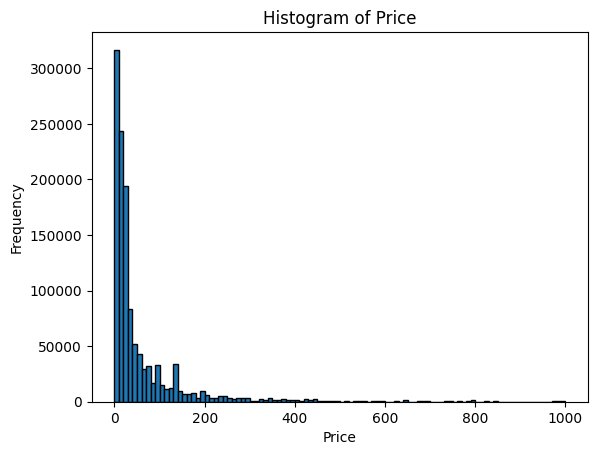

In [ ]:
import matplotlib.pyplot as plt
# Plot a histogram of 'price' values
plt.hist(offi_df['price'].dropna(), bins=100, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

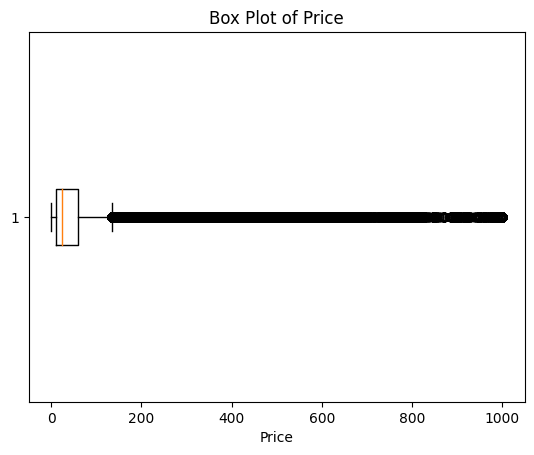

In [ ]:
# Create a box plot of 'price' values
plt.boxplot(offi_df['price'].dropna(), vert=False)
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

In [ ]:
offi_df.isna().sum()

reviewerID             0
asin                   0
reviewerName        6801
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
price                  0
title               5279
brand             422381
main_category          0
sub_category           0
date                   0
year                   0
dtype: int64

In [ ]:
# converting helpfull to 'helpfull' and 'not helpfull'

# Apply the extraction function to create 'helpfull' ,total votes and  'not_helpfull' columns
offi_df['Helpful'], offi_df['total_votes'] = zip(*offi_df['helpful'].apply(extract_elements))



In [ ]:
offi_df['unhelpful_votes'] = offi_df['total_votes'] - offi_df['Helpful']

In [ ]:
offi_df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes
1243181,A23UIUEO9PVK1G,B00LQZE2KM,roy dempsey,"[0, 0]",I am a stationery retailer and came across the...,5.0,awesome,1405728000,5.990000,Lightahead&reg; LA-7553 Expanding File Folder ...,NaN,Office Products,Office & School Supplies,2014-07-19,2014,0,0,0
1243182,A3W0IG7LIY99CK,B00LSYQC7C,pettygirl,"[0, 0]","My kids LOVE these, especially my daughter who...",5.0,"My kids LOVE these, especially my daughter who...",1405296000,23.242188,"Friend Chips Trading and Collecting Game, 4 Ch...",NaN,Office Products,Office & School Supplies,2014-07-14,2014,0,0,0
1243183,AX0OWSOOJA1ZJ,BT008G9O8G,Jason E.S. Clements,"[0, 0]",Even though I recieved an e-mail indicating th...,5.0,Very NIce Transaction,1392854400,29.660000,Cont Removable Paper Label,Brother,Office Products,Office & School Supplies,2014-02-20,2014,0,0,0
1243184,A17R4GQHT3RW2R,BT008G9O9A,Natalie Woods-sproule,"[0, 0]",I was very pleased with the purchase of the la...,5.0,Very pleased with the purchase.,1365897600,16.950000,1/2&quot; Round Paper Labels,Brother,Office Products,Office & School Supplies,2013-04-14,2013,0,0,0
1243185,A12TWUP92WJJHB,BT008G9O9A,tornadokat,"[3, 4]",I bought several sized labels for my Brother G...,3.0,a review of labels? Sure why not!,1294963200,16.950000,1/2&quot; Round Paper Labels,Brother,Office Products,Office & School Supplies,2011-01-14,2011,3,4,1


In [ ]:
offi_df['Helpful'].value_counts()

0       35292
1        8858
2        2768
3        1540
4         822
        ...  
476         1
1280        1
147         1
192         1
114         1
Name: Helpful, Length: 277, dtype: int64

In [ ]:
offi_df['unhelpful_votes'].value_counts()

0      1047844
1       120747
2        33056
3        14165
4         7734
        ...   
272          1
146          1
333          1
143          1
120          1
Name: unhelpful_votes, Length: 165, dtype: int64

In [ ]:
offi_df.isna().sum()

reviewerID              0
asin                    0
reviewerName         6801
helpful                 0
reviewText              0
overall                 0
summary                 0
unixReviewTime          0
price                   0
title                5279
brand              422381
main_category           0
sub_category            0
date                    0
year                    0
Helpful                 0
total_votes             0
unhelpful_votes         0
dtype: int64

In [ ]:
# finding the count of unique values
unique_cust=review_df['reviewerID'].nunique()
unique_product=offi_df['asin'].nunique()

number_of_review_per_cust=len(review_df['reviewText'])/unique_cust
num_of_review_per_product=len(offi_df)/unique_product


results = {
    'Unique Customers': unique_cust,
    'Unique Products': unique_product,
    'Number of Reviews per Customer': number_of_review_per_cust,
    'Number of Reviews per Product': num_of_review_per_product
}

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])

# Print the resulting DataFrame
result_df


,Value
Unique Customers,909314.000000
Unique Products,130006.000000
Number of Reviews per Customer,1.367169
Number of Reviews per Product,9.562528


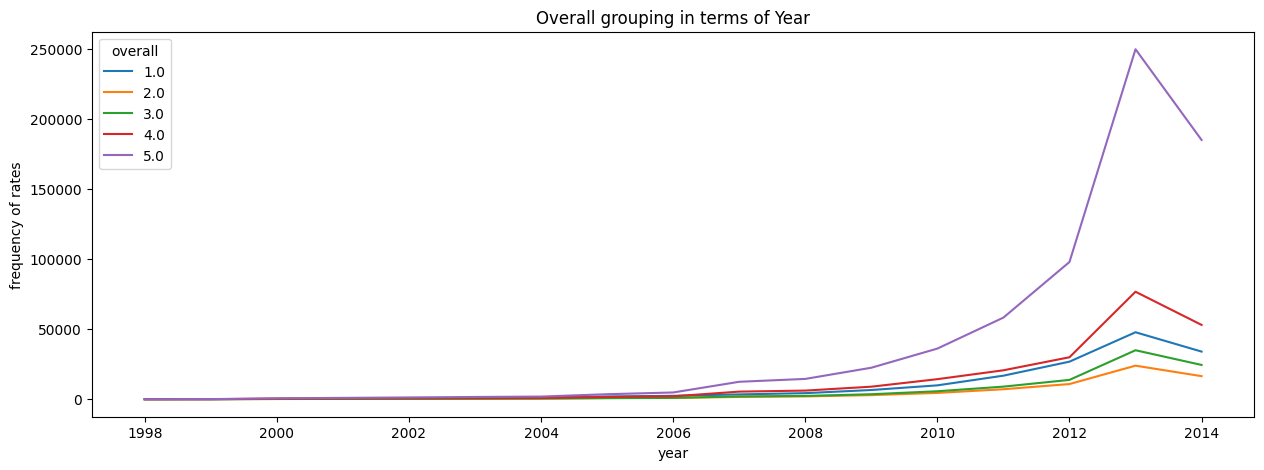

In [ ]:
# analysing the Ratings over-the year

def rate(df):
    year_rate = pd.crosstab(df.year, df.overall, rownames = ['year'], colnames = ['overall'])
    #print(year_rate)
    year_rate.plot(kind = 'line', figsize= (15, 5))
    plt.ylabel('frequency of rates')
    plt.title ('Overall grouping in terms of Year');



rate(offi_df)

In [ ]:
with_brand_df=offi_df.copy()

In [ ]:
# Save the cleaned DataFrame to a CSV file for trial purpose.
with_brand_df.to_csv('cleaned_data_with_brand.csv', index=False)

In [ ]:
offi_df.isna().sum()

reviewerID              0
asin                    0
reviewerName         6801
helpful                 0
reviewText              0
overall                 0
summary                 0
unixReviewTime          0
price                   0
title                5279
brand              422381
main_category           0
sub_category            0
date                    0
year                    0
Helpful                 0
total_votes             0
unhelpful_votes         0
dtype: int64

In [ ]:
len(offi_df)

1243186

In [ ]:
offi_df.drop(columns=['brand'],axis=1,inplace=True)

In [ ]:
# now removing all other null values as they are very small when compared to the whole dataset
offi_df.dropna(inplace=True)
offi_df.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
price             0
title             0
main_category     0
sub_category      0
date              0
year              0
Helpful           0
not_Helpful       0
dtype: int64

# sentiment Analysis

In [ ]:
# text preprocessing

In [ ]:
import string

import re

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# for sentiment analysis
from textblob import TextBlob

In [ ]:
# merging the summary and review text in ta a single column
offi_df['review']=offi_df['reviewText'].str.cat(offi_df['summary'],sep=' ')

offi_df.drop(columns=['reviewText','summary'],axis=1,inplace=True)

offi_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",5.0,1374192000,93.060000,NaN,NaN,Office Products,Office & School Supplies,2013-07-19,2013,0,0,0,This is an awesome resource to go with the TE ...
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,even though they were refurbished the colors w...
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,"A good deal and I can make them work ok, BUT I..."
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,Nice added stocking stuffer. Beautiful additi...
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",1.0,1379721600,23.242188,NaN,NaN,Office Products,Office & School Supplies,2013-09-21,2013,0,0,0,Could not get the game to run. I have Windows...


In [ ]:
offi_df['review'][1]

'even though they were refurbished the colors were vivid and the cartridges lasted a long time. Will order again from these folks worked great'

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Removing white spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Removing web links
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # Removing punctuation
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)

    return text

In [ ]:
offi_df['cleaned_text']=offi_df['review'].apply(preprocess_text)



In [ ]:
offi_df['cleaned_text'][1]

'even though they were refurbished the colors were vivid and the cartridges lasted a long time will order again from these folks worked great'

In [ ]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

# Function to perform lemmatization and stopwords removal
def lemmatize_text (text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)



In [ ]:
offi_df['cleaned_text']=offi_df['cleaned_text'].apply(lemmatize_text)
offi_df['cleaned_text'][1]

'even though refurbished color vivid cartridge lasted long time order folk worked great'

In [ ]:
# setntiment analysis using text blob


# fuction for plority score
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
offi_df['polarity']=offi_df['cleaned_text'].apply(get_polarity)
offi_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",5.0,1374192000,93.060000,NaN,NaN,Office Products,Office & School Supplies,2013-07-19,2013,0,0,0,This is an awesome resource to go with the TE ...,awesome resource go te still trying figure use...,0.933333
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,even though they were refurbished the colors w...,even though refurbished color vivid cartridge ...,0.291667
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,"A good deal and I can make them work ok, BUT I...",good deal make work ok live dry climate tend d...,0.106881
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,Nice added stocking stuffer. Beautiful additi...,nice added stocking stuffer beautiful addition...,0.766667
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",1.0,1379721600,23.242188,NaN,NaN,Office Products,Office & School Supplies,2013-09-21,2013,0,0,0,Could not get the game to run. I have Windows...,could get game run window ran window program s...,-0.400000


In [ ]:
offi_df[offi_df['overall']==2]

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity
7,A1BUVOGGFTGMBN,0439394058,ANON,"[5, 5]",2.0,1389744000,11.64,Scholastic SC939405 All-In-One Schoolhouse Cal...,Scholastic,Office Products,Office & School Supplies,2014-01-15,2014,5,5,0,This is not coated in plastic as the descripti...,coated plastic description indicates thin card...,-0.212500
14,AYVV0R6U3HRIR,0439394058,hm86,"[0, 0]",2.0,1399593600,11.64,Scholastic SC939405 All-In-One Schoolhouse Cal...,Scholastic,Office Products,Office & School Supplies,2014-05-09,2014,0,0,0,So I should have read reviews: I saw an overal...,read review saw overall high rating thought wo...,0.117778
73,AODYPN5LTCYE9,0439505372,"April M. Blake ""Mommy of Twin Boys""","[0, 0]",2.0,1314230400,11.62,Scholastic Apple Time Incentive Chart (TF2128),NaN,Office Products,Office & School Supplies,2011-08-25,2011,0,0,0,We homeschool. My son picked this incentive c...,homeschool son picked incentive chart love app...,0.650000
75,AI8BGVBHIKVYC,0439505399,Amazon Customer,"[0, 0]",2.0,1359331200,2.88,Scholastic Weather Dial Chart (TF2131),Scholastic,Office Products,Office & School Supplies,2013-01-28,2013,0,0,0,For $7 this product was very disappointing and...,product disappointing flimsy didnt come clasp ...,-0.400000
76,A20OBSG4UF7NVH,0439505399,april dornsbach,"[0, 0]",2.0,1379376000,2.88,Scholastic Weather Dial Chart (TF2131),Scholastic,Office Products,Office & School Supplies,2013-09-17,2013,0,0,0,I was under the impression this would come put...,impression would come put together least requi...,-0.043333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242947,A3U4J8XSAIK3D3,B00KL0ZRKC,buellblaster,"[0, 0]",2.0,1405209600,20.99,Axiom 2Pack PG240XL PG-240XL Black Cartridge F...,NaN,Office Products,Office & School Supplies,2014-07-13,2014,0,0,0,Beware that these are refills and NOT generic ...,beware refill generic newthey need marked refu...,0.078788
1242967,APRNS6DB68LLV,B00KLLBEPI,"Rob Slaven ""slavenrm@gmail. com""","[2, 5]",2.0,1405900800,10.99,"Classic Glow Filler Paper, Wide Ruled,600, MAD...",NaN,Office Products,Office & School Supplies,2014-07-21,2014,2,5,3,As usual I received this item free in exchange...,usual received item free exchange review also ...,0.071377
1242988,AEMJCFBMSAVRW,B00KLOZIYS,lucid one,"[0, 0]",2.0,1404864000,9.99,Pro Office Premium 1000 Self Adhesive Labels f...,NaN,Office Products,Office & School Supplies,2014-07-09,2014,0,0,0,These labels aren't thick enough to cover what...,label arent thick enough cover whats underneat...,0.212500
1243042,A81P47EIXM8HA,B00KOO599O,"Richardson ""Clarence""","[2, 2]",2.0,1403740800,79.43,"SentrySafe FHW40220 Large File Safe, Charcoal ...",NaN,Office Products,Office & School Supplies,2014-06-26,2014,2,2,0,I have a larger safe which I use for contracts...,larger safe use contract paperwork offered vin...,0.141216


* here we are setting a parameter for the polarity score , in this way we can perfectly distingush the sentiment of reviews

In [ ]:
def analyze_sentiment(score):
    if score >= 0.3:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
offi_df['sentiment']=offi_df['polarity'].apply(analyze_sentiment)
offi_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity,sentiment
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",5.0,1374192000,93.060000,NaN,NaN,Office Products,Office & School Supplies,2013-07-19,2013,0,0,0,This is an awesome resource to go with the TE ...,awesome resource go te still trying figure use...,0.933333,Positive
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,even though they were refurbished the colors w...,even though refurbished color vivid cartridge ...,0.291667,Neutral
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,"A good deal and I can make them work ok, BUT I...",good deal make work ok live dry climate tend d...,0.106881,Neutral
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,Nice added stocking stuffer. Beautiful additi...,nice added stocking stuffer beautiful addition...,0.766667,Positive
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",1.0,1379721600,23.242188,NaN,NaN,Office Products,Office & School Supplies,2013-09-21,2013,0,0,0,Could not get the game to run. I have Windows...,could get game run window ran window program s...,-0.400000,Negative


In [ ]:
offi_df['sentiment'].value_counts()

Neutral     563906
Positive    536924
Negative    142356
Name: sentiment, dtype: int64

In [ ]:
offi_df['overall'].value_counts()

5.0    691493
4.0    222123
1.0    157570
3.0     99136
2.0     72864
Name: overall, dtype: int64

### Saving the cleaned file

In [ ]:

output_path_1 = '/content/drive/MyDrive/cleaned_office_and sentiment_with_brand.csv'
offi_df.to_csv(output_path_1, index=False)

In [ ]:
offi_df.drop(columns=['brand'],axis=1,inplace=True)
offi_df.dropna(inplace=True)

In [ ]:


output_path_2= '/content/drive/MyDrive/cleaned_office_and sentiment.csv'
offi_df.to_csv(output_path_2, index=False)



## Wordclouds

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap

In [ ]:
cv = CountVectorizer(stop_words = 'english')
def wordcloud(df):
  words = cv.fit_transform(df.review)
  sum_words = words.sum(axis=0)

  words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

  wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
  plt.figure(figsize=(10,12 ))
  plt.imshow(wordcloud)
  plt.axis('off')

In [ ]:
positive=offi_df.loc[offi_df['sentiment']=='Positive']


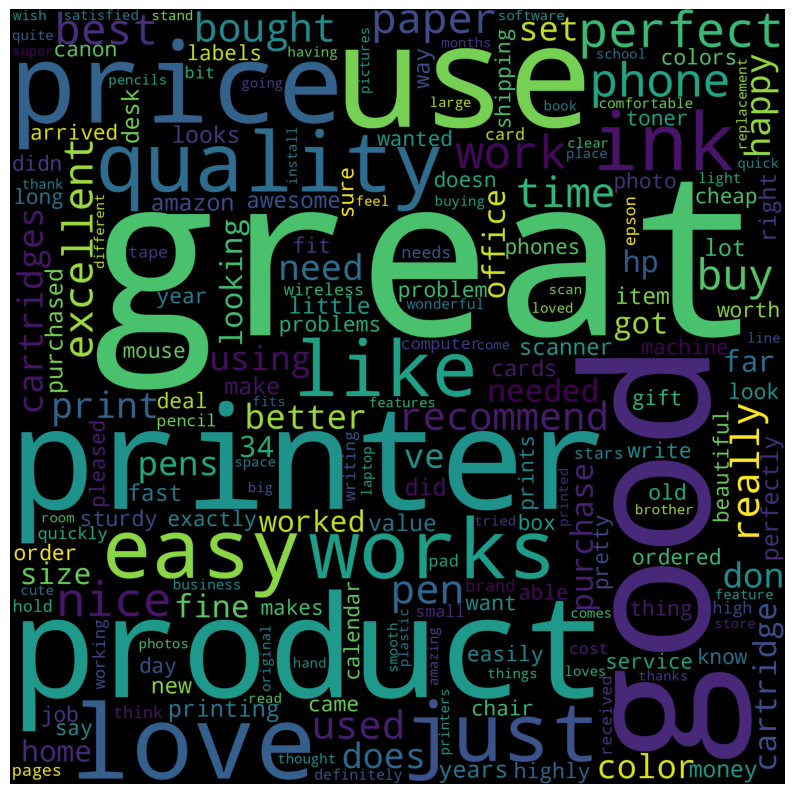

In [ ]:
wordcloud(positive)

* Through this word cloud Picturization we can see that wich words are prominent in the positive revies.
* Here in this case we can see The word 'Great' is the most occuring or the most used word.

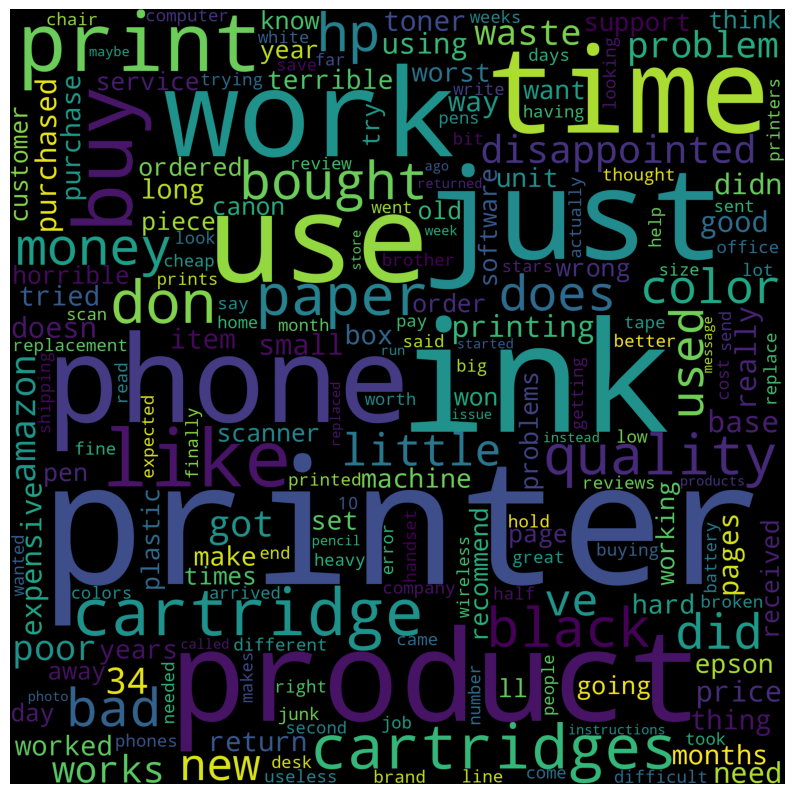

In [ ]:
negative=offi_df.loc[offi_df['sentiment']=='Negative']
wordcloud(negative)


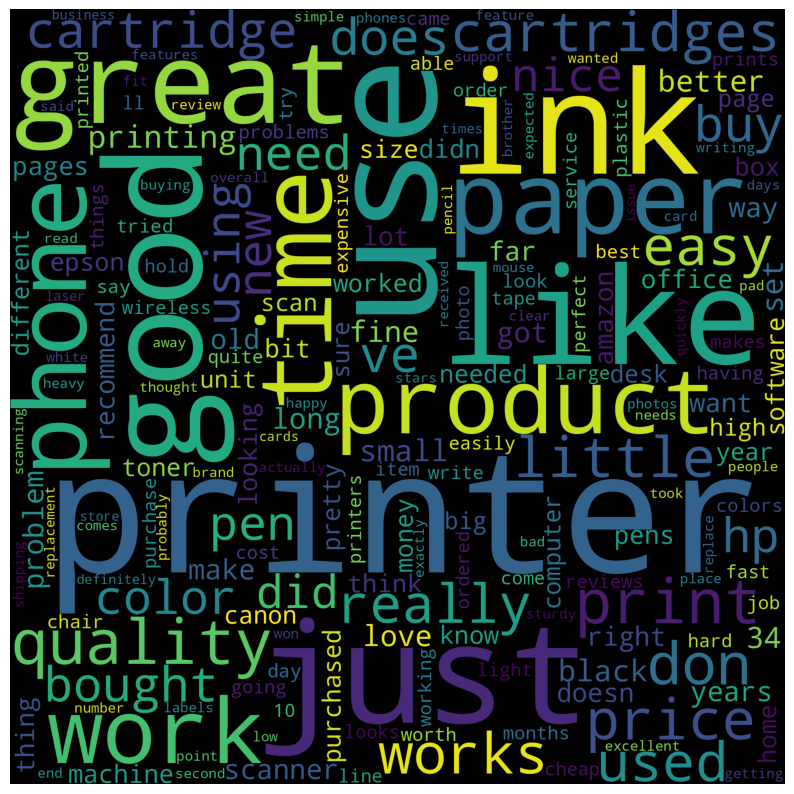

In [ ]:
neutral=offi_df.loc[offi_df['sentiment']=='Neutral']
wordcloud(neutral)

# CDs and vinyl

In [ ]:
# review_data
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_CDs_and_Vinyl.json.gz

#metadata
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_CDs_and_Vinyl.json.gz

--2023-09-11 19:00:14--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_CDs_and_Vinyl.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1257613399 (1.2G) [application/x-gzip]
Saving to: ‘reviews_CDs_and_Vinyl.json.gz’

reviews_CDs_and_Vin 100%[===================>]   1.17G  18.8MB/s    in 48s     

2023-09-11 19:01:02 (25.2 MB/s) - ‘reviews_CDs_and_Vinyl.json.gz’ saved [1257613399/1257613399]

--2023-09-11 19:01:02--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_CDs_and_Vinyl.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146331112 (140M) [application/x-gzip]
Saving to: ‘meta_CDs_and_Vinyl.json.gz’

meta_CDs_and_Vinyl. 1

In [ ]:
path1_digital='/content/reviews_CDs_and_Vinyl.json.gz'

cd_review=getDF(path1_digital)
#digital_meta=getDF(path2_digital)

In [ ]:
cd_review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A9DMTMLFR9CO5,0001393774,Albert Luguterah,"[0, 0]",fantastic. old time religion is good for me. t...,5.0,i love it,1377907200,"08 31, 2013"
1,AHG1GTQZUYNJN,0001393774,CAROLYNE CHAMBERLAIN,"[0, 0]",I HAD THE ALBUM FOR YEARS AGO ....AND I AM VER...,5.0,PURE JOY!,1372723200,"07 2, 2013"
2,A2TFO7NREP2B2D,0001393774,cindy terpening_smith,"[0, 0]",Pure praise to throne room. He had a unique st...,5.0,pure,1396396800,"04 2, 2014"
3,A2YAPAG1IPNK7K,0001393774,diane tousley,"[0, 0]",I have always loved Keith Green's music and ha...,5.0,Love this CD!,1392422400,"02 15, 2014"
4,AEKGGV851HY3K,0001393774,D. MILLS,"[13, 15]",Keith Green had a passionate love for Jesus. ...,5.0,Passionate Faith Is Contagious,1130803200,"11 1, 2005"


In [ ]:
cd_review.isnull().sum()

reviewerID           0
asin                 0
reviewerName      8733
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [ ]:
cd_review.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

In [ ]:
cd_review.shape

(3749004, 9)

In [ ]:
cd_review.overall.value_counts()

5.0    2519202
4.0     672525
3.0     264825
1.0     160131
2.0     132321
Name: overall, dtype: int64

In [ ]:
# as this dataset is too huge we had disided to make it to resample it based on the overall values as this
# keep the propotions
# here we are using train test split and the stratified random sampling based on 'overall'


In [ ]:
from sklearn.model_selection import train_test_split

total_samples = len(cd_review)
target_count = int(total_samples * 0.5)

sampled_data = {}


for value in cd_review['overall'].unique():
    sub_df = cd_review[cd_review['overall'] == value]


    train_size = min(int(len(sub_df) * 0.5), target_count)

    sampled_data[value], _ = train_test_split(sub_df, train_size=train_size, stratify=sub_df['overall'])


# Concatenate sampled DataFrames to create the final sampled DataFrame
cd_review_2 = pd.concat(sampled_data.values(), ignore_index=True)


sampled_proportions = cd_review_2['overall'].value_counts(normalize=True)
print("Sampled Proportions:")
print(sampled_proportions)

Sampled Proportions:
5.0    0.671966
4.0    0.179388
3.0    0.070639
1.0    0.042713
2.0    0.035295
Name: overall, dtype: float64


In [ ]:
cd_review_2['overall'].value_counts()

5.0    1259601
4.0     336262
3.0     132412
1.0      80065
2.0      66160
Name: overall, dtype: int64

In [ ]:
output_path = '/content/drive/MyDrive/cd_review_2'
cd_review_2.to_csv(output_path, index=False)

In [ ]:
# Load the sampled data from Google Drive
upload_data_path = '/content/drive/MyDrive/cd_review_2'
cd_review_3 = pd.read_csv(upload_data_path)

In [ ]:
cd_review_3.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",I LOVE dancing so much and thought this would ...,5.0,CLUB dancing!,952819200,"03 12, 2000"
1,A2F3BKP990ND5Q,B001CITRLM,El Cubanito &#34;Ed&#34;,"[3, 3]",I grew up listening to more than a few of thes...,5.0,Great Mambos!,1234742400,"02 16, 2009"
2,A239EWPH3JAWZY,B00004S81P,Tyler,"[0, 1]",Every old school song on this cd is good. The ...,5.0,Millennium Hip Hop Makes There Best Mix,966470400,"08 17, 2000"
3,APWTSVK9NNEOL,B000CS4L1E,Car radio man,"[4, 5]",I kid you not! Actually maybe its Leonard Cohe...,5.0,Patsy Kline channeled thru Moby,1144281600,"04 6, 2006"
4,A17C6U3MX5MC3E,B00005A11O,"Sergiy Beketov ""apollinaris""","[13, 14]","De-Phazz, headed as always by Pit Baumgartner,...",5.0,So sexually tasteful!,993340800,"06 24, 2001"


In [ ]:
#meta
path2_meta='/content/meta_CDs_and_Vinyl.json.gz'
cd_meta=getDF(path2_meta)

In [ ]:
cd_meta.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0001501348,"Lenny LeBlanc, Alex Acuna, Justo Almario, Tom ...",Lift Him Up With Ron Kenoly [VHS],http://ecx.images-amazon.com/images/I/412JH6CM...,"{'also_bought': ['6303646611', 'B000002C45', '...",{'Movies & TV': 359265},"[[CDs & Vinyl, Christian, Pop & Contemporary],...",NaN,NaN
1,0001393774,Audio CD,Songs for the Shepherd,http://ecx.images-amazon.com/images/I/51MC7A5N...,"{'also_bought': ['B0016CP2GS', 'B0000275QQ', '...",{'Music': 41017},"[[CDs & Vinyl, Christian]]",16.64,
2,0005123909,18 Music Videos for Kids: Do Your Ears Hang Lo...,Silly Songs: 18 Wholesome Fun Songs for Kids [...,http://ecx.images-amazon.com/images/I/41K31EWE...,"{'also_bought': ['B00000JLTM', 'B00006L97L', '...",{'Movies & TV': 451209},"[[CDs & Vinyl, Children's Music], [Movies & TV...",29.98,NaN
3,0005072298,NaN,Hymns: 16 Classic Hymns for Children,http://ecx.images-amazon.com/images/I/510RRJWQ...,"{'also_viewed': ['B00000DPLL', 'B000008UPG', '...",{'Music': 350804},"[[CDs & Vinyl, Children's Music], [CDs & Vinyl...",6.26,NaN
4,0005224896,NaN,"Voice of the Wind: Personal Worship, Vol. 1",http://ecx.images-amazon.com/images/I/51SS0SRM...,"{'also_bought': ['B001EMSQOK', 'B001EMQ6H4', '...",{'Music': 347825},"[[CDs & Vinyl, Christian, Praise & Worship]]",8.99,NaN


In [ ]:
cd_meta.tail()

,asin,description,title,imUrl,related,salesRank,categories,price,brand
492794,B00LAI5H6S,Desert Route Live Music CD - The first album r...,NaN,http://ecx.images-amazon.com/images/I/51GQZtzE...,{'also_viewed': ['B000FTAIBC']},{'Music': 127112},"[[CDs & Vinyl, Rock, Blues Rock]]",NaN,NaN
492795,B00LEJS044,Lifestyle brings forth Matt Marshak's most hon...,NaN,http://ecx.images-amazon.com/images/I/61qr4tq-...,"{'also_bought': ['B00KPX71IQ', 'B00L6AW67I', '...",{'Music': 24972},"[[CDs & Vinyl, Jazz, Smooth Jazz]]",32.98,NaN
492796,B00LG9GR3S,DO YOU HEAR THAT? A cacophony of nature's sym...,NaN,http://ecx.images-amazon.com/images/I/61LxQBVx...,NaN,NaN,"[[CDs & Vinyl, New Age, Relaxation]]",NaN,NaN
492797,B00LH0CAT6,Angelica's debut album featuring 6 brand new c...,NaN,http://ecx.images-amazon.com/images/I/51C49I-D...,NaN,NaN,"[[CDs & Vinyl, Christian, Pop & Contemporary]]",NaN,NaN
492798,B00LKZBEDQ,"Vocalist Dara Tucker has a rich, emphatic voic...",NaN,http://ecx.images-amazon.com/images/I/61%2BQ5o...,NaN,NaN,"[[CDs & Vinyl, Jazz, Vocal Jazz]]",NaN,NaN


In [ ]:
cd_meta.shape

(492799, 9)

In [ ]:
cd_meta.isnull().sum()

asin                0
description    164586
title          142766
imUrl             914
related        155684
salesRank        8569
categories          0
price          138991
brand          440930
dtype: int64

In [ ]:
# MERGING
cd_df=pd.merge(cd_review_3,cd_meta,on='asin')

cd_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,title,imUrl,related,salesRank,categories,price,brand
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",I LOVE dancing so much and thought this would ...,5.0,CLUB dancing!,952819200,"03 12, 2000","Go, Fatima!is cooler than a five-dollar snow c...",Learn To Dance : Go Fatima ! [VHS],http://ecx.images-amazon.com/images/I/51B4ZSD1...,NaN,{'Movies & TV': 404147},"[[CDs & Vinyl, Children's Music, Disney], [CDs...",NaN,NaN
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]","Hello, if you love to dance and, you love crea...",5.0,Brent's Review,946080000,"12 25, 1999","Go, Fatima!is cooler than a five-dollar snow c...",Learn To Dance : Go Fatima ! [VHS],http://ecx.images-amazon.com/images/I/51B4ZSD1...,NaN,{'Movies & TV': 404147},"[[CDs & Vinyl, Children's Music, Disney], [CDs...",NaN,NaN
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",I have been waiting for this video for months....,5.0,This is great,943920000,"11 30, 1999","Go, Fatima!is cooler than a five-dollar snow c...",Learn To Dance : Go Fatima ! [VHS],http://ecx.images-amazon.com/images/I/51B4ZSD1...,NaN,{'Movies & TV': 404147},"[[CDs & Vinyl, Children's Music, Disney], [CDs...",NaN,NaN
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",I never thought that this video would be this ...,5.0,"Go Fatima,and Don't Stop...",952732800,"03 11, 2000","Go, Fatima!is cooler than a five-dollar snow c...",Learn To Dance : Go Fatima ! [VHS],http://ecx.images-amazon.com/images/I/51B4ZSD1...,NaN,{'Movies & TV': 404147},"[[CDs & Vinyl, Children's Music, Disney], [CDs...",NaN,NaN
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",I know that if a big gurl like me can bust a m...,5.0,I love and Fatima is the bomb!,1035504000,"10 25, 2002","Go, Fatima!is cooler than a five-dollar snow c...",Learn To Dance : Go Fatima ! [VHS],http://ecx.images-amazon.com/images/I/51B4ZSD1...,NaN,{'Movies & TV': 404147},"[[CDs & Vinyl, Children's Music, Disney], [CDs...",NaN,NaN


In [ ]:
cd_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

In [ ]:
cd_df.isna().sum()

reviewerID              0
asin                    0
reviewerName         4418
helpful                 0
reviewText             81
overall                 0
summary                78
unixReviewTime          0
reviewTime              0
description        467260
title              521659
imUrl                2859
related            142263
salesRank           12611
categories              0
price              129511
brand             1696780
dtype: int64

In [ ]:
cd_df.shape

(1874500, 17)

In [ ]:
bran=cd_df.brand.value_counts()[:10]

<Axes: >

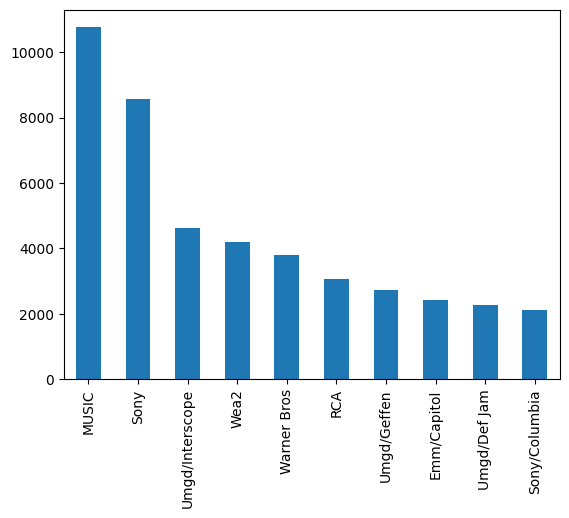

In [ ]:
bran.plot(kind='bar')

In [ ]:
cd_df.drop(columns=['description','salesRank','imUrl'],axis=1,inplace=True)

In [ ]:
# Remove the outer brackets using string slicing
cd_df['categories'] = cd_df['categories'].str[0]

# Apply the extraction function to create 'main_category' and 'sub_category' columns
cd_df['main_category'], cd_df['sub_category'] = zip(*cd_df['categories'].apply(extract_elements))

In [ ]:
cd_df['main_category'].value_counts(dropna=False)

CDs & Vinyl              1872532
Arts, Crafts & Sewing        876
Beauty                       849
Baby Products                127
Automotive                    70
Appliances                    46
Name: main_category, dtype: int64

In [ ]:
cd_df['sub_category'].value_counts(dropna=False)

Alternative Rock      390351
Pop                   313198
Classic Rock          161028
Classical             143712
Dance & Electronic    105369
                       ...  
Yarn                       1
Replacement Parts          1
Tools & Equipment          1
Safety & Cleaning          1
Cases & Transport          1
Name: sub_category, Length: 64, dtype: int64

In [ ]:
# removing the categories column
cd_df.drop('categories',axis=1,inplace=True)

In [ ]:
# dealing with the price data


# Calculate mean price per sub-category
category_digital_means = cd_df.groupby('sub_category')['price'].mean()
category_digital_means

sub_category
Alternative Rock            16.776378
Art Supplies                30.901273
Bath & Body                 29.317059
Bathing & Skin Care         12.780000
Beading & Jewelry-Making    25.725000
                              ...    
Thread                       9.880000
Tools & Accessories         32.150588
Tools & Equipment           45.080000
World Music                 23.352812
Yarn                        11.710000
Name: price, Length: 63, dtype: float64

In [ ]:
# Impute missing 'price' values based on sub-category means
for category, mean_price in category_digital_means.items():
    mask = (cd_df['sub_category'] == category) & cd_df['price'].isnull()
    cd_df.loc[mask, 'price'] = mean_price


cd_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,related,price,brand,main_category,sub_category
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",I LOVE dancing so much and thought this would ...,5.0,CLUB dancing!,952819200,"03 12, 2000",Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]","Hello, if you love to dance and, you love crea...",5.0,Brent's Review,946080000,"12 25, 1999",Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",I have been waiting for this video for months....,5.0,This is great,943920000,"11 30, 1999",Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",I never thought that this video would be this ...,5.0,"Go Fatima,and Don't Stop...",952732800,"03 11, 2000",Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",I know that if a big gurl like me can bust a m...,5.0,I love and Fatima is the bomb!,1035504000,"10 25, 2002",Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music


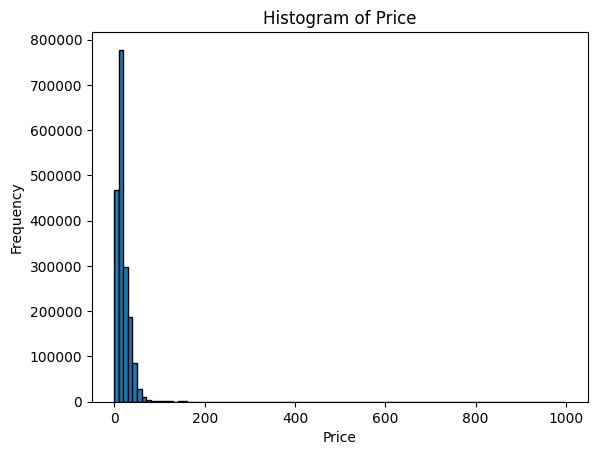

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cd_df['price'].dropna(), bins=100, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

In [ ]:
cd_df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
title              object
related            object
price             float64
brand              object
main_category      object
sub_category       object
Helpful            object
not_Helpful        object
dtype: object

In [ ]:
def extract_elements(lst_str):

    lst = eval(lst_str)

    if len(lst) >= 2:
        return lst[0], lst[1]
    elif len(lst) == 1:
        return lst[0], None
    else:
        return None, None

In [ ]:
# converting helpfull to 'helpfull' and 'not helpfull'

# Apply the extraction function to create 'helpfull' and 'not_helpfull' columns
cd_df['Helpful'], cd_df['total_votes'] = zip(*cd_df['helpful'].apply(extract_elements))



In [ ]:
cd_df['unhelpful_votes'] = cd_df['total_votes'] - cd_df['Helpful']

In [ ]:
cd_df['Helpful'].value_counts()

0      801021
1      346355
2      203247
3      132160
4       88651
        ...  
352         1
364         1
306         1
288         1
394         1
Name: Helpful, Length: 375, dtype: int64

In [ ]:
# converting the review time to date


cd_df['date'] = pd.to_datetime(cd_df['reviewTime'], format='%m %d, %Y')

# Drop the original 'reviewTime' column
cd_df.drop(columns=['reviewTime'],inplace=True)

cd_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,title,related,price,brand,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",I LOVE dancing so much and thought this would ...,5.0,CLUB dancing!,952819200,Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music,18,18,0,2000-03-12
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]","Hello, if you love to dance and, you love crea...",5.0,Brent's Review,946080000,Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music,4,5,1,1999-12-25
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",I have been waiting for this video for months....,5.0,This is great,943920000,Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music,5,7,2,1999-11-30
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",I never thought that this video would be this ...,5.0,"Go Fatima,and Don't Stop...",952732800,Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music,0,0,0,2000-03-11
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",I know that if a big gurl like me can bust a m...,5.0,I love and Fatima is the bomb!,1035504000,Learn To Dance : Go Fatima ! [VHS],NaN,17.301576,NaN,CDs & Vinyl,Children's Music,9,12,3,2002-10-25


In [ ]:
# Extract year from 'date' and create a new 'year' column
cd_df['year'] = cd_df['date'].dt.year

In [ ]:
cd_df.isna().sum()

reviewerID              0
asin                    0
reviewerName         4418
helpful                 0
reviewText             81
overall                 0
summary                78
unixReviewTime          0
title              521659
related            142263
price                5519
brand             1447088
main_category           0
sub_category        15322
Helpful                 0
not_Helpful             0
date                    0
year                    0
dtype: int64

In [ ]:
cd_copy=cd_df.copy()

In [ ]:
cd_copy.drop(columns=['brand','title','related'],axis=1,inplace=True)
cd_copy.isna().sum()

reviewerID             0
asin                   0
reviewerName        4418
helpful                0
reviewText            81
overall                0
summary               78
unixReviewTime         0
price               5519
main_category          0
sub_category       15322
Helpful                0
total_votes            0
unhelpful_votes        0
date                   0
year                   0
dtype: int64

In [ ]:
cd_copy.dropna(inplace=True)

In [ ]:
cd_copy.shape

(1854659, 15)

# sentiment analysis

In [ ]:
# merging the summary and review text in ta a single column
cd_copy['review']=cd_copy['reviewText'].str.cat(cd_copy['summary'],sep=' ')

cd_copy.drop(columns=['reviewText','summary'],axis=1,inplace=True)

cd_copy.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date,year,review
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,0,2000-03-12,2000,I LOVE dancing so much and thought this would ...
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1,1999-12-25,1999,"Hello, if you love to dance and, you love crea..."
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,2,1999-11-30,1999,I have been waiting for this video for months....
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,0,2000-03-11,2000,I never thought that this video would be this ...
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,3,2002-10-25,2002,I know that if a big gurl like me can bust a m...


In [ ]:
# preprocessing the review text

cd_copy['cleaned_text']=cd_copy['review'].apply(preprocess_text)


In [ ]:
cd_copy['cleaned_text'][1]

'hello if you love to dance and you love creative dance steps youll love the new creaton from fatima the best dancer choreograher in the businessi had a ball finally mastering all the popular dance steps from the backstreet boys and the hot dancersinger extradinaire aaliyah im an aspiring dancer and fatima taught me a wonderful routine to use at auditions buy this one you wont regret it brents review'

In [ ]:
cd_copy['cleaned_text']=cd_copy['cleaned_text'].apply(lemmatize_text)
cd_copy['cleaned_text'][1]

'hello love dance love creative dance step youll love new creaton fatima best dancer choreograher businessi ball finally mastering popular dance step backstreet boy hot dancersinger extradinaire aaliyah im aspiring dancer fatima taught wonderful routine use audition buy one wont regret brent review'

In [ ]:
#setiment analysis using text blob
cd_copy['polarity']=cd_copy['cleaned_text'].apply(get_polarity)
cd_copy.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date,year,review,cleaned_text,polarity
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,0,2000-03-12,2000,I LOVE dancing so much and thought this would ...,love dancing much thought would great video ge...,0.353571
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1,1999-12-25,1999,"Hello, if you love to dance and, you love crea...",hello love dance love creative dance step youl...,0.498636
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,2,1999-11-30,1999,I have been waiting for this video for months....,waiting video month excited fatima robinson be...,0.495833
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,0,2000-03-11,2000,I never thought that this video would be this ...,never thought video would great awesomei huge ...,0.666667
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,3,2002-10-25,2002,I know that if a big gurl like me can bust a m...,know big gurl like bust move club using fatima...,0.233333


In [ ]:
# analysisng the sentiment
cd_copy['sentiment']=cd_copy['polarity'].apply(analyze_sentiment)
cd_copy.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date,year,review,cleaned_text,polarity,sentiment
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,0,2000-03-12,2000,I LOVE dancing so much and thought this would ...,love dancing much thought would great video ge...,0.353571,Positive
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1,1999-12-25,1999,"Hello, if you love to dance and, you love crea...",hello love dance love creative dance step youl...,0.498636,Positive
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,2,1999-11-30,1999,I have been waiting for this video for months....,waiting video month excited fatima robinson be...,0.495833,Positive
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,0,2000-03-11,2000,I never thought that this video would be this ...,never thought video would great awesomei huge ...,0.666667,Positive
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,3,2002-10-25,2002,I know that if a big gurl like me can bust a m...,know big gurl like bust move club using fatima...,0.233333,Neutral


In [ ]:
cd_copy['sentiment'].value_counts()

Neutral     900929
Positive    861228
Negative     92502
Name: sentiment, dtype: int64

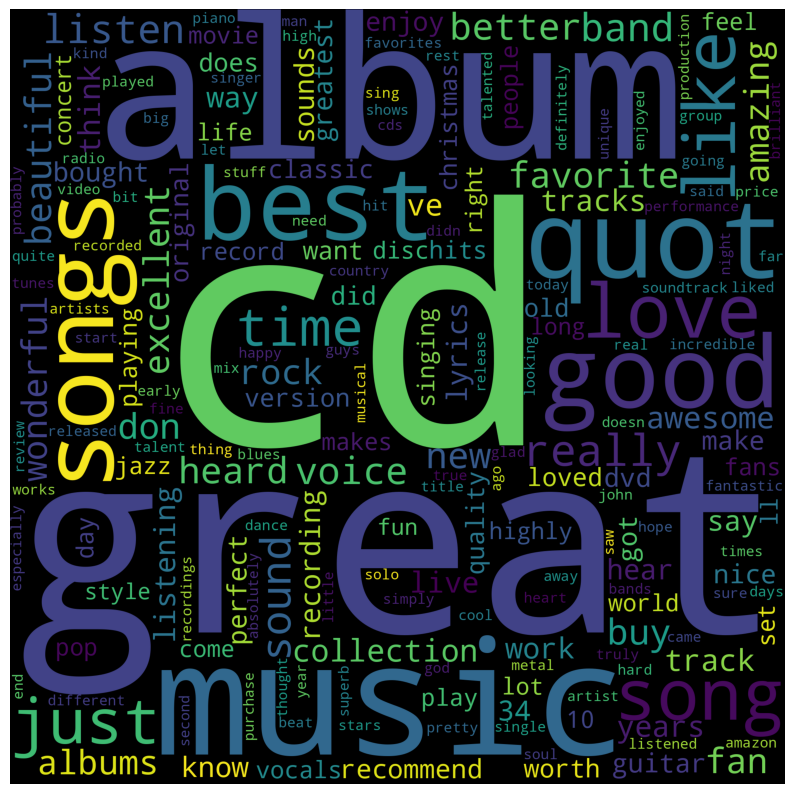

In [ ]:
# making worclouds

di_positive=cd_copy[cd_copy['sentiment']=='Positive']
wordcloud(di_positive)

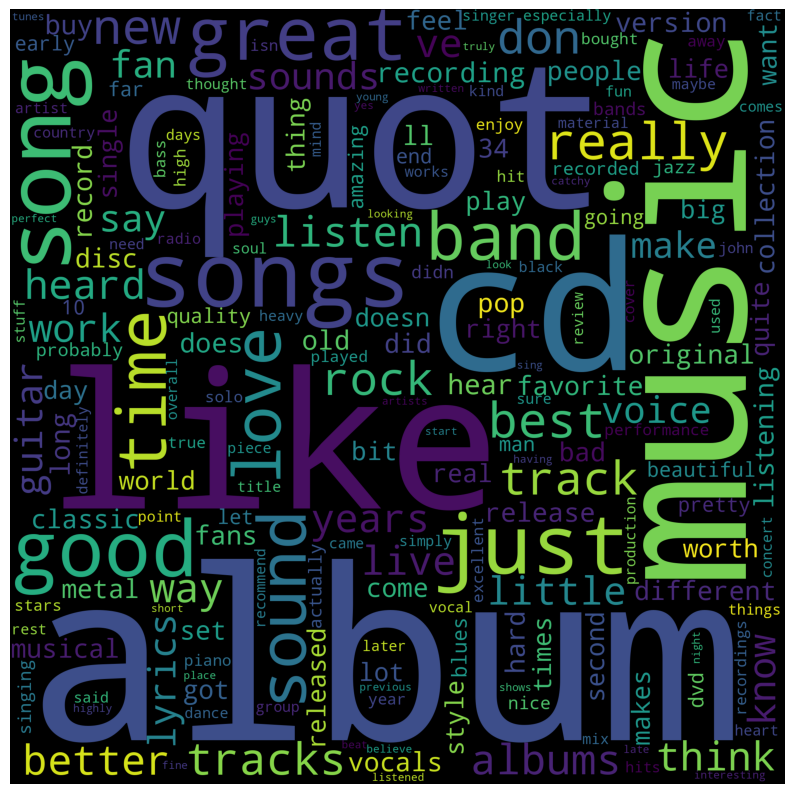

In [ ]:
di_neutral=cd_copy[cd_copy['sentiment']=='Neutral']
wordcloud(di_neutral)

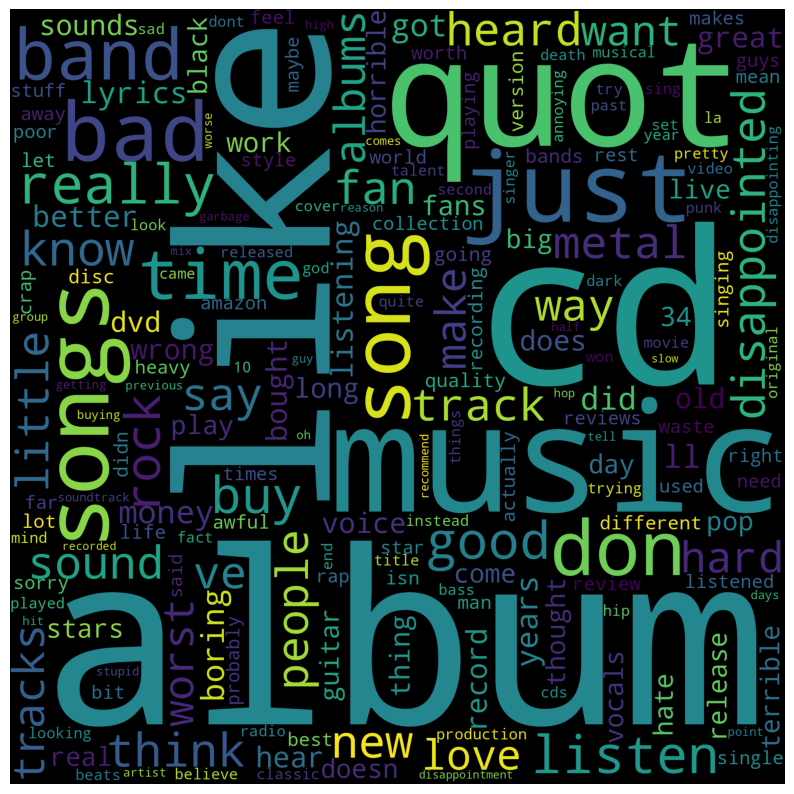

In [ ]:
di_neg=cd_copy[cd_copy['sentiment']=='Negative']
wordcloud(di_neg)

In [ ]:
# importing the cleaned csv

cd_copy.to_csv('digital_cleaned',index=False)

In [ ]:
output_path = '/content/drive/MyDrive/cleaned_cd.csv'
cd_copy.to_csv(output_path, index=False)

In [ ]:
cd_copy2=cd_copy.copy()

In [ ]:
cd_copy2.drop(columns=['review','cleaned_text'],inplace=True)

In [ ]:
cd_copy2.to_csv('digital_cleaned_2',index=False)

In [ ]:
output_path = '/content/drive/MyDrive/cleaned_cd_2.csv'
cd_copy2.to_csv(output_path, index=False)